<a href="https://colab.research.google.com/github/Yonah-Tech/DATA-SCIENCE-UICT-AUGUST-2025/blob/main/Capstone_Urban_Flood_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Urban Pluvial Flood Risk Prediction
### Student: ODONGKARA YONAH
---
This project addresses urban pluvial flooding using the provided dataset. It follows the capstone structure: problem statement, objectives, data exploration, data preprocessing, modeling, evaluation, and conclusion.

## 1. Problem Statement
Urban areas often face flooding risks due to poor drainage and extreme rainfall events. The goal of this project is to analyze the flood risk dataset and build a simple model to predict flood-prone conditions. This will help in understanding risk patterns and guide potential urban planning solutions.

## 2. Objectives
- Load and explore the dataset
- Perform basic data preprocessing and cleaning
- Conduct exploratory data analysis (EDA)
- Build and evaluate a predictive model
- Provide conclusions and recommendations

## 3. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 4. Load the Dataset

In [3]:
df = pd.read_csv('/content/urban_pluvial_flood_risk_dataset.csv')
df.head()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


## 5. Data Exploration

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   segment_id                           2963 non-null   object 
 1   city_name                            2963 non-null   object 
 2   admin_ward                           2963 non-null   object 
 3   latitude                             2963 non-null   float64
 4   longitude                            2963 non-null   float64
 5   catchment_id                         2963 non-null   object 
 6   elevation_m                          2802 non-null   float64
 7   dem_source                           2963 non-null   object 
 8   land_use                             2963 non-null   object 
 9   soil_group                           2601 non-null   object 
 10  drainage_density_km_per_km2          2679 non-null   float64
 11  storm_drain_proximity_m       

,latitude,longitude,elevation_m,drainage_density_km_per_km2,storm_drain_proximity_m,historical_rainfall_intensity_mm_hr,return_period_years
count,2963.000000,2963.000000,2802.000000,2679.000000,2724.000000,2963.000000,2963.000000
mean,19.399103,31.676123,37.689818,6.290866,123.202203,43.811441,19.730003
std,24.446320,79.542482,38.708958,2.187365,107.764541,25.221200,25.182883
min,-36.999038,-123.292949,-3.000000,1.270000,0.200000,5.400000,2.000000
25%,6.580006,-43.124581,8.725000,4.670000,47.975000,25.800000,5.000000
50%,23.760802,36.889173,25.130000,6.250000,91.700000,37.900000,10.000000
75%,37.887422,101.701136,59.620000,7.830000,162.625000,55.550000,25.000000
max,55.821219,174.911271,266.700000,12.070000,751.700000,150.000000,100.000000


In [5]:
df.isnull().sum()

,0
segment_id,0
city_name,0
admin_ward,0
latitude,0
longitude,0
catchment_id,0
elevation_m,161
dem_source,0
land_use,0
soil_group,362


## 6. Exploratory Data Analysis (EDA)

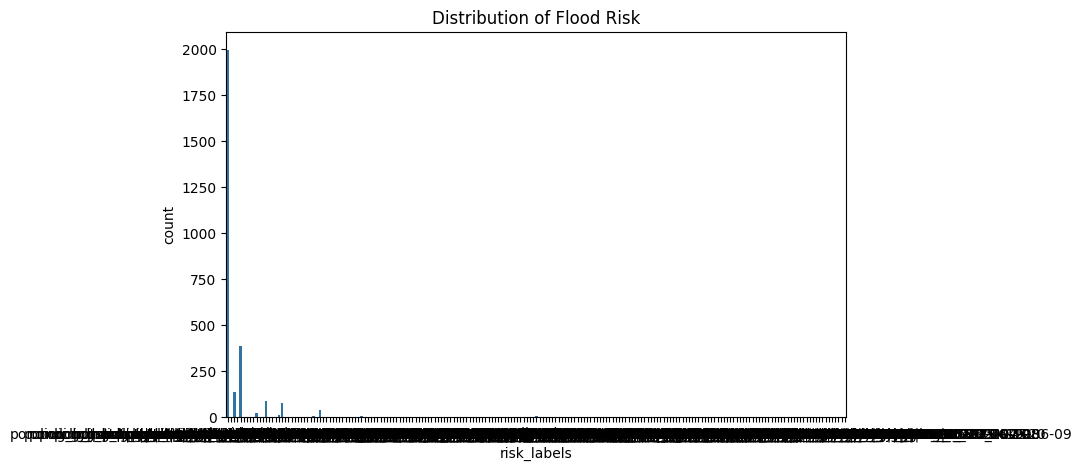

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='risk_labels', data=df)
plt.title('Distribution of Flood Risk')
plt.show()

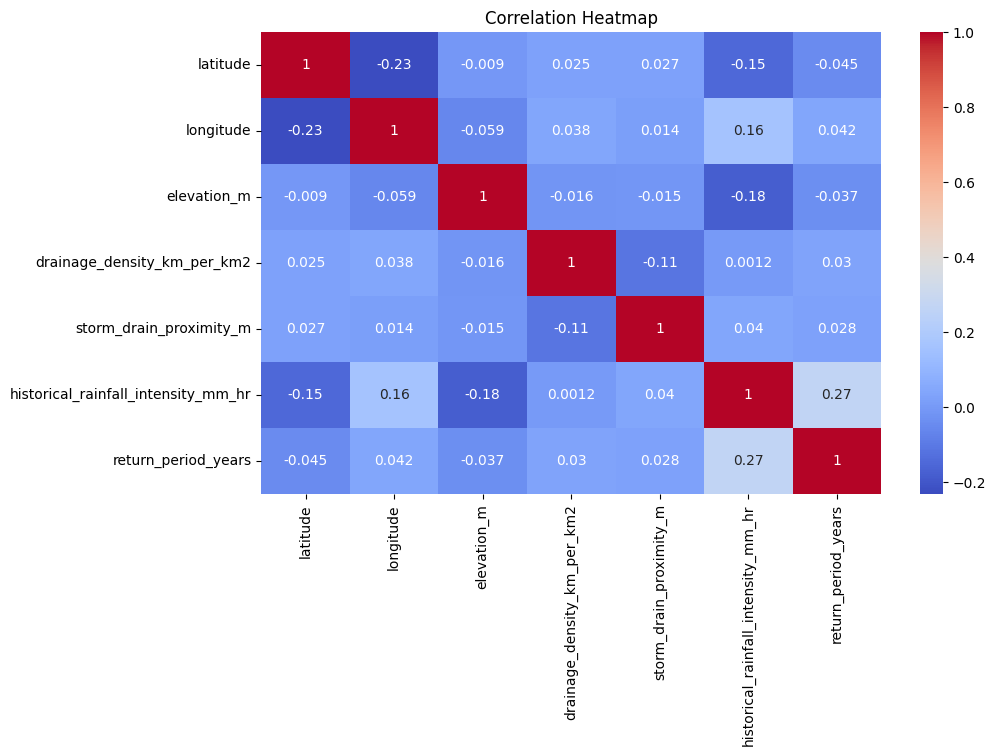

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 7. Data Preprocessing

In [12]:
# Drop missing values (if small) or fill them
df = df.dropna()

# Define features and target (assuming 'risk_labels' is target column)
X = df.drop('risk_labels', axis=1)
y = df['risk_labels']

# Select only numeric features for scaling
X_numeric = X.select_dtypes(include=np.number)

# Train-test split (using only numeric features)
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 8. Model Building and Evaluation

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8075801749271136

Classification Report:
                                                                  precision    recall  f1-score   support

                                           extreme_rain_history       0.65      0.88      0.75        17
                          extreme_rain_history|event_2023-07-09       0.00      0.00      0.00         1
                          extreme_rain_history|event_2024-08-06       0.00      0.00      0.00         1
                                 extreme_rain_history|low_lying       0.00      0.00      0.00         2
                                                      low_lying       0.54      0.75      0.63        36
                                     low_lying|event_2022-07-30       0.00      0.00      0.00         1
                                     low_lying|event_2022-10-14       0.00      0.00      0.00         1
                                     low_lying|event_2023-07-31       0.00      0.00      0.00         1


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

## 9. Conclusion
- The dataset has been explored, cleaned, and analyzed.
- A Logistic Regression model was built to predict flood risk.
- Future work may include testing more complex models (Random Forest, Gradient Boosting).
- Insights can support urban planning strategies to reduce flood vulnerability.